In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from gapminder import gapminder

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from formulaic import Formula

In [6]:
"""
1. Queremos estudiar la relacion entre la longitud de la aleta de un pinguino y el peso del ping¨uino.
Como en una esfera, el peso es proporcional a la longitud del radio elevada al cubo, podemos
conjeturar que un polinomio de grado 3 es apropiado para ajustar el peso en funcion de la
longitud de la aleta. Queremos verificar si nuestra conjetura tiene sustento en los datos.
(a) Datos faltantes. Ejecutar el siguiente codigo y observar si hay filas con datos faltantes
(NaN).
penguins = sns . load_dataset (" penguins ")
penguins . head ()
Para hacerlo en forma mas sistematica (en lugar de mirar solo algunas filas) podes usar
el siguiente codigo
penguins . isnull () . values .any ()
Para eliminar las filas con valores faltantes aplicamos al DataFrame el metodo dropna().
Eliminar las filas con datos faltantes del DataFrame de ping¨uinos y verificar que el
DataFrame resultante no contiene valores faltantes
"""
penguins = sns.load_dataset ("penguins")
print(penguins . isnull () . values .any ())# consulto si tiene lineas NaN
penguins = penguins.dropna() #saque las filas con datos NaN
penguins . isnull () . values .any () # consulto si tiene lineas NaN. Como es False, ya me quedo trank
penguins.head()

True


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [7]:
"""
(b) Dividir el dataset resultante en un grupo de entrenamiento y uno de test (80% - 20%)
"""
print("Tamaño del dataset:", len(penguins))

# Preparar los datos
X = penguins[['flipper_length_mm']]  # Longitud de la aleta como característica
y = penguins['body_mass_g']  # Peso del pingüino como variable objetivo

# Dividir el dataset en un grupo de entrenamiento y uno de prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar la cantidad de datos en cada conjunto
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))


Tamaño del dataset: 333
Tamaño del conjunto de entrenamiento: 266
Tamaño del conjunto de prueba: 67


In [8]:

"""
(c) Crear y ajustar 3 modelos utilizando polinomios de grados 1, 2 y 3.
"""
modelos = []
# Iterar sobre los grados de polinomios
for grado in [1, 2, 3]:
    polynomial_features = PolynomialFeatures(degree=grado)
    X_train_poly = polynomial_features.fit_transform(X_train)
    # print('aa')
    
    modelo = LinearRegression()
    modelo.fit(X_train_poly, y_train)
    
    modelos.append((grado, modelo))
    
    # Calcular el error cuadrático medio en el conjunto de prueba
    X_test_poly = polynomial_features.transform(X_test)
    y_pred = modelo.predict(X_test_poly)
    ecm = mean_squared_error(y_test, y_pred)
    print(f"Grado del polinomio {grado}: ecm = {ecm}")

# Seleccionar el modelo con el menor error cuadrático medio en el conjunto de prueba
best_degree, best_model = min(modelos, key=lambda x: mean_squared_error(y_test, x[1].predict(PolynomialFeatures(degree=x[0]).fit_transform(X_test))))
print(f"El mejor modelo es un polinomio de grado {best_degree}")


Grado del polinomio 1: ecm = 129886.71972544755
Grado del polinomio 2: ecm = 127731.22567377475
Grado del polinomio 3: ecm = 123664.64922895115
El mejor modelo es un polinomio de grado 3


In [9]:
"""
(d) Calcular para cada uno el error prediccion en el grupo de entrenamiento y en el grupo de
test.
"""
"""
(e) ¿Cual modelo tiene el menor error (ECM) en el ajuste? ¿Cual el menor error (ECM) de
prediccion?
"""
print(f"d)")
# Inicialización de variables para almacenar los mejores modelos
min_ecm_train = float('inf')
min_ecm_test = float('inf')
best_fit_model = None
best_pred_model = None

# Crear y evaluar modelos
modelos = []
for grado in [1, 2, 3]:
    poly_features = PolynomialFeatures(degree=grado)
    X_train_poly = poly_features.fit_transform(X_train)
    modelo = LinearRegression()
    modelo.fit(X_train_poly, y_train)
    modelos.append((grado, modelo))

    # Calcular ECM para el conjunto de entrenamiento y de prueba
    y_train_pred = modelo.predict(X_train_poly)
    y_test_pred = modelo.predict(poly_features.transform(X_test))
    ecm_train = mean_squared_error(y_train, y_train_pred)
    ecm_test = mean_squared_error(y_test, y_test_pred)

    # Actualizar el mejor modelo en función del ECM de entrenamiento
    if ecm_train < min_ecm_train:
        min_ecm_train = ecm_train
        best_fit_model = (grado, modelo)

    # Actualizar el mejor modelo en función del ECM de prueba
    if ecm_test < min_ecm_test:
        min_ecm_test = ecm_test
        best_pred_model = (grado, modelo)

    print(f"Grado del polinomio {grado}:")
    print(f"    ECM en el conjunto de entrenamiento: {ecm_train}")
    print(f"    ECM en el conjunto de prueba: {ecm_test}")

# Imprimir los resultados de los mejores modelos
print(f"e)")
print(f"El modelo con el menor ECM en el ajuste es un polinomio de grado {best_fit_model[0]} con ECM = {min_ecm_train}")
print(f"El modelo con el menor ECM de predicción es un polinomio de grado {best_pred_model[0]} con ECM = {min_ecm_test}")


d)
Grado del polinomio 1:
    ECM en el conjunto de entrenamiento: 159873.09549908538
    ECM en el conjunto de prueba: 129886.71972544755
Grado del polinomio 2:
    ECM en el conjunto de entrenamiento: 147737.63110722063
    ECM en el conjunto de prueba: 127731.22567377475
Grado del polinomio 3:
    ECM en el conjunto de entrenamiento: 143995.99465654764
    ECM en el conjunto de prueba: 123664.64922895115
e)
El modelo con el menor ECM en el ajuste es un polinomio de grado 3 con ECM = 143995.99465654764
El modelo con el menor ECM de predicción es un polinomio de grado 3 con ECM = 123664.64922895115


In [10]:
"""
(f) En base a los resultados obtenidos, ¿cual de los tres modelos utilizarıa?
"""
"El 3"


'El 3'

In [11]:
"""
2. En el archivo 50_startups.csv tenemos los siguientes datos de 50 companıas: gastos en
investigacion y desarrollo, gastos administrativos, gastos en marketing y ganancias. Queremos
estimar las ganancias a partir de los gastos en las distintas areas.

(a) Leer el archivo, y realizar un grafico de dispersion para cada par de variables. Se pueden
generar todos los graficos automaticamente con el pairplot.
"""
startups = pd.read_csv('./datos/50_startups.csv')
# sns.pairplot(
#     data= startups, aspect=.8
# )
"""
En base a estos graficos, si quisieramos predecir la ganancia mediante un modelo lineal
utilizando una sola variable predictora, ¿cual variable utilizarıa? Disenar un experimento
para verificar su respuesta
"""

# Paso 1: Cargar los datos
startups = pd.read_csv('./datos/50_startups.csv')

# Paso 1.1: Excluir columnas no numéricas
startups_numeric = startups.select_dtypes(include=['float64', 'int64'])

# Paso 2: Calcular la correlación entre las variables
correlation = startups_numeric.corr()
print("Correlación con las ganancias:")
print(correlation['Ganancia'])

# Paso 3 y 4: Entrenar modelos lineales y evaluar su rendimiento
variables_predictoras = ['Investigacion', 'Administracion', 'Marketing']

for variable in variables_predictoras:
    # Seleccionar la variable como predictor y las ganancias como variable dependiente
    X = startups[[variable]]
    y = startups['Ganancia']
    
    # Dividir los datos en conjunto de entrenamiento y conjunto de prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entrenar el modelo lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Evaluar el rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred)
    print(f"Variable predictora: {variable}, MSE: {mse}")

# Paso 5: Comparar los resultados

Correlación con las ganancias:
Investigacion     0.972900
Administracion    0.200717
Marketing         0.747766
Ganancia          1.000000
Name: Ganancia, dtype: float64
Variable predictora: Investigacion, MSE: 59510962.80787996
Variable predictora: Administracion, MSE: 964533647.8006195
Variable predictora: Marketing, MSE: 900533964.2328259


In [12]:
"""
(b) En este ejemplo, ¿considera que un modelo lineal multivariado ayudarıa a predecir mejor
la ganancia que el modelo lineal univariado del ıtem anterior? Realizar un experimento
para verificar su respuesta.
"""
display(startups.head())
startups.Estado.unique() #new york, california, florida
startups.isnull().values.any() # consulto si tiene lineas NaN. Como es False, ya me quedo trank

# Crear variables predictoras y variable dependiente
y, X = (
    Formula('Ganancia ~ Marketing + Administracion + Investigacion + Estado')
    .get_model_matrix(startups)
)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y ajustar el modelo lineal
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)

# Imprimir coeficientes
print("Coeficientes:", modelo.coef_)

# Evaluar el modelo multivariado
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo lineal multivariado:", mse)


Investigacion  Administracion  Marketing      Estado   Ganancia
0      165349.20       136897.80  471784.10    New York  192261.83
1      162597.70       151377.59  443898.53  California  191792.06
2      153441.51       101145.55  407934.54     Florida  191050.39
3      144372.41       118671.85  383199.62    New York  182901.99
4      142107.34        91391.77  366168.42     Florida  166187.94

Coeficientes: [[ 5.01253438e+04  2.69798610e-02 -2.70043196e-02  8.06023114e-01
   1.98788793e+02 -4.18870191e+01]]
MSE del modelo lineal multivariado: 66470218.015456036


In [13]:
"""
3. En el Ejercicio 1 no tuvimos en cuenta el sexo del ping¨uino para predecir el peso, y puede
ser una variable importante. Se quiere predecir ahora el peso de un ping¨uino usando como
variables predictoras el largo de la aleta y el sexo del ping¨uino (utilizar el DataFrame sin datos
faltantes, como vimos en el Ejercicio 1 (a)).
"""
penguins = sns.load_dataset ("penguins")
print(penguins . isnull () . values .any ())# consulto si tiene lineas NaN
penguins = penguins.dropna() #saque las filas con datos NaN
penguins . isnull () . values .any () # consulto si tiene lineas NaN. Como es False, ya me quedo trank
penguins.head()


True


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [14]:
"""
(a) ¿Cuales son todos los valores que toma la variable “sex”? ¿Que tipo de variable es:
numerica o categorica, ordinal o nominal? ¿Es una variable binaria?
"""
penguins.sex.unique()
print('Toma variables categoricas nominal (no hay orden inherente ente las categorias macho hembra')
print('Puede hacerse interpretar como una variable binaria')


Toma variables categoricas nominal (no hay orden inherente ente las categorias macho hembra
Puede hacerse interpretar como una variable binaria


In [15]:
"""
(b) Escribir (en lapiz y papel) la ecuacion de un modelo lineal para este caso. ¿Que unidades
tienen las variables y como se codifica la variable “sexo del pinguino”?
"""
print("Un modelo lineal simple con las variables largo de la aleta (numérica) y sexo (categórica) podría escribirse como:    \nPeso =𝛽0 + 𝛽1× Largo de la Aleta + 𝛽2× Sexo    \nDonde:    \n𝛽0: es el intercepto    \n𝛽1: es el coeficiente para el largo de la aleta (en mm),    \n𝛽2: es el coeficiente para el sexo, ajustado dependiendo de la codificación usada (0 o 1 para masculino y femenino, respectivamente, si se usa codificación binaria).")

Un modelo lineal simple con las variables largo de la aleta (numérica) y sexo (categórica) podría escribirse como:    
Peso =𝛽0 + 𝛽1× Largo de la Aleta + 𝛽2× Sexo    
Donde:    
𝛽0: es el intercepto    
𝛽1: es el coeficiente para el largo de la aleta (en mm),    
𝛽2: es el coeficiente para el sexo, ajustado dependiendo de la codificación usada (0 o 1 para masculino y femenino, respectivamente, si se usa codificación binaria).


In [16]:
"""
(c) Codificacion de variables binarias. Si utilizamos Formulaic para generar la matriz de
datos e incluimos la variable sexo en el modelo, automaticamente va a crear una columna
con el sexo codificado con 0’s y 1’s.
Alternativamente, podemos utilizar el siguiente codigo:
"""

from sklearn . preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
sex01 = encoder.fit_transform(penguins[["sex"]])
penguins["sex01"] = sex01

In [17]:
"""
(d) Ajustar el modelo usando todos los datos disponibles. Reportar los coeficientes encontrados y calcular el error de prediccion (ECM).
¿Considera que agregar la variable “sex” mejoro el modelo?
"""

formula = 'body_mass_g ~ flipper_length_mm + sex01'
y, X =  Formula(formula).get_model_matrix(penguins)
y = y.squeeze()

In [18]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el ECM y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')
print(f'Error cuadrático medio (ECM): {mse}')
print(f'R^2: {r2}')


Coeficientes: [  0.          47.36694421 338.90293776]
Intercepto: -5481.821971122372
Error cuadrático medio (ECM): 95989.19237831887
R^2: 0.8476221262890309


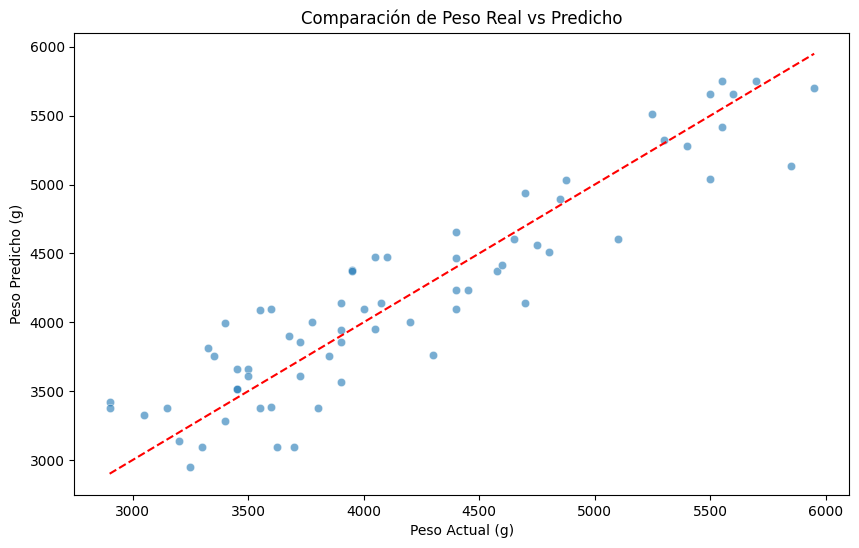

In [21]:
"""
(e) Realizar una visualizacion apropiada para ver de los datos junto con las predicciones del
modelo.
"""
import matplotlib.pyplot as plt

# Suponiendo que ya tienes y_test e y_pred definidos como los valores reales y predichos de tu modelo

# Crear un DataFrame para visualizar
data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Crear un scatter plot con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Actual', y='Predicted', alpha=0.6)
plt.plot([data['Actual'].min(), data['Actual'].max()], [data['Actual'].min(), data['Actual'].max()], 'r--')  # Línea de identidad
plt.title('Comparación de Peso Real vs Predicho')
plt.xlabel('Peso Actual (g)')
plt.ylabel('Peso Predicho (g)')
plt.show()



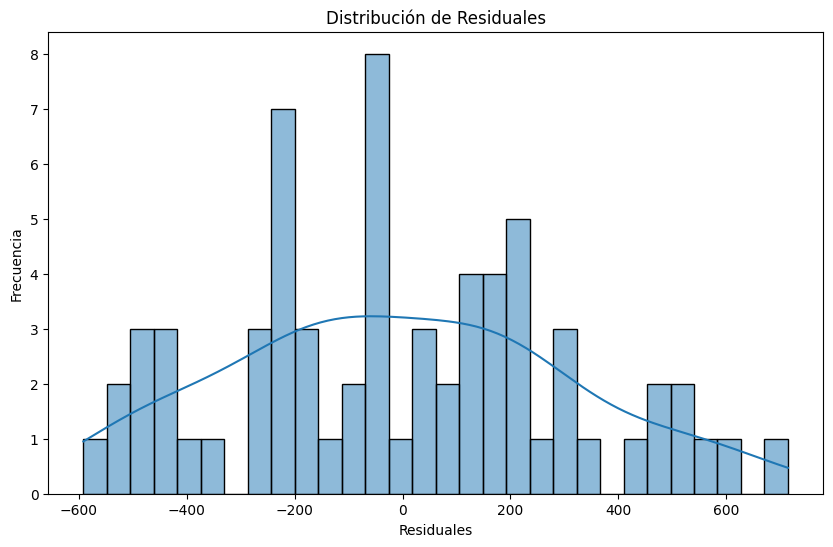

In [22]:
# Calcular residuales
data['Residuals'] = data['Actual'] - data['Predicted']

# Visualizar residuales
plt.figure(figsize=(10, 6))
sns.histplot(data['Residuals'], bins=30, kde=True)
plt.title('Distribución de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()


In [23]:
"""
(f) Dos ping¨uinos que tienen igual largo de aleta, uno macho y otro hembra, ¿que diferencia
de peso predice el modelo que tendran?
"""
# Suponiendo que el coeficiente de 'sex01' está en la segunda posición de model.coef_
coeficiente_sex = model.coef_[1]

print(f"Diferencia de peso predicha entre sexos para igual largo de aleta: {coeficiente_sex} g")


Diferencia de peso predicha entre sexos para igual largo de aleta: 47.36694420579687 g


In [27]:
"""
4. Ahora se quiere predecir el peso de un pinguino usando como variables predictoras el largo de
la aleta y la especie del ping¨uino.

(a) Trabajamos con la base de ping¨uinos sin datos faltantes. ¿Cuales son todos los valores
que toma la variable “species”? ¿Que tipo de variable es: numerica o categorica, ordinal
o nominal? ¿Es una variable binaria?

"""
penguins = sns.load_dataset ("penguins")
print(penguins . isnull () . values .any ())# consulto si tiene lineas NaN
penguins = penguins.dropna() #saque las filas con datos NaN
penguins . isnull () . values .any () # consulto si tiene lineas NaN. Como es False, ya me quedo trank

print("Son tres:")
print(penguins.species.unique())
print("Son variables categoricas nominales, no es binaria pero se puede interpretar con dos columnas en el dataset")
penguins.head()



True
Son tres:
['Adelie' 'Chinstrap' 'Gentoo']
Son variables categoricas nominales, no es binaria pero se puede interpretar con dos columnas en el dataset


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [36]:
"""
(b) Escribir (en lapiz y papel) la ecuacion de un modelo lineal para este caso. ¿Como se codifica la variable “especie”?
(c) Explicar que diferencia tiene este modelo respecto al propuesto en el ejercicio 1.
"""
print("Un modelo lineal simple con las variables largo de la aleta (numérica) y sexo (categórica) podría escribirse como:    \nPeso =𝛽0 + 𝛽1× Largo de la Aleta + 𝛽2× Especie    \nDonde:    \n𝛽0: es el intercepto    \n𝛽1: es el coeficiente para el largo de la aleta (en mm),    \n𝛽2: es el coeficiente para el sexo, ajustado dependiendo de la codificación usada.\nLa codificacion usada serán 2 columnas binarias que representen la especie perteneciente.\nLa diferencia es que al tener 3 valores no se puede representar de manera binaria en una sola columna y usar valores mayores puede interferir en calculos futuros o en la claridad de lectura de los mismos.")

Un modelo lineal simple con las variables largo de la aleta (numérica) y sexo (categórica) podría escribirse como:    
Peso =𝛽0 + 𝛽1× Largo de la Aleta + 𝛽2× Especie    
Donde:    
𝛽0: es el intercepto    
𝛽1: es el coeficiente para el largo de la aleta (en mm),    
𝛽2: es el coeficiente para el sexo, ajustado dependiendo de la codificación usada.
La codificacion usada serán 2 columnas binarias que representen la especie perteneciente.
La diferencia es que al tener 3 valores no se puede representar de manera binaria en una sola columna y usar valores mayores puede interferir en calculos futuros o en la claridad de lectura de los mismos.


In [47]:
"""
(d) Codificacion de variables categoricas. Si utilizamos Formulaic para generar la matriz de datos e incluimos variables categoricas, automaticamente va a crear las columnas
indicadoras con 0’s y 1’s necesarias (variables dummies).
Alternativamente podemos usar el siguiente codigo que utiliza la funcion OneHotEncoder:
[...]
Si utilizan este codigo, verifiquen que los tama˜nos de species3 y penguins3 sean los
esperados, y que el DataFrame resultante no tenga datos faltantes (como el DataFrame
original no tiene faltantes, este tampoco deberıa tenerlos, pero nunca esta mal verificarlo).

"""
from sklearn . preprocessing import OneHotEncoder
penguins = sns . load_dataset ("penguins") . dropna ()
encoderOHE = OneHotEncoder ( sparse_output = False )
species3 = encoderOHE . fit_transform ( penguins [["species"]])
species3_df = pd . DataFrame ( species3 ,
    columns = encoderOHE . get_feature_names_out () ,
    index = penguins . index )
penguins3 = pd . concat ([ penguins , species3_df ] , axis = 1)
penguins3 . head ()


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  species_Adelie  species_Chinstrap  species_Gentoo  
0       3750.0    Male             1.0                0.0             0.0  
1       3800.0  Female             1.0                0.0             0.0  
2       3250.0  Female             1.0                0.0             0.0  
4       3450.0  Female             1.0                0.0             0.0  
5       3650.0    Male             1.0                0.0             0.0

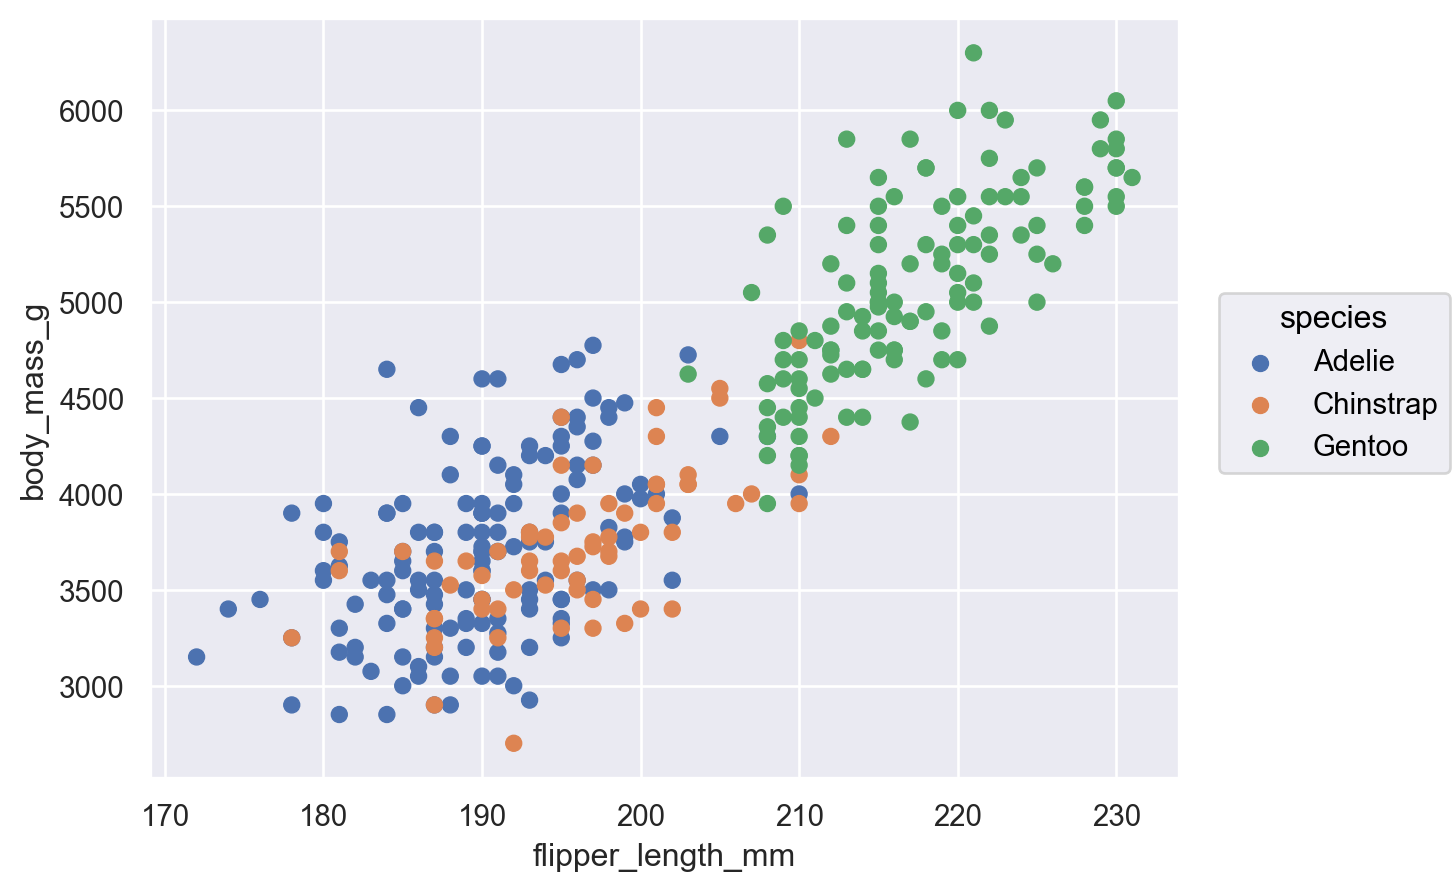

In [49]:
import seaborn.objects as so

# Visualización de las relaciones
p = so.Plot(penguins3, x='flipper_length_mm', y='body_mass_g', color='species').add(so.Dot())
p


In [53]:
# Definir características y etiquetas
X = penguins3[['flipper_length_mm'] + list(encoderOHE.get_feature_names_out())]
y = penguins3['body_mass_g']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 122185.52466993102
R2 Score: 0.8060368049135853


Text(0.5, 1.0, 'Valores Reales vs Predichos')

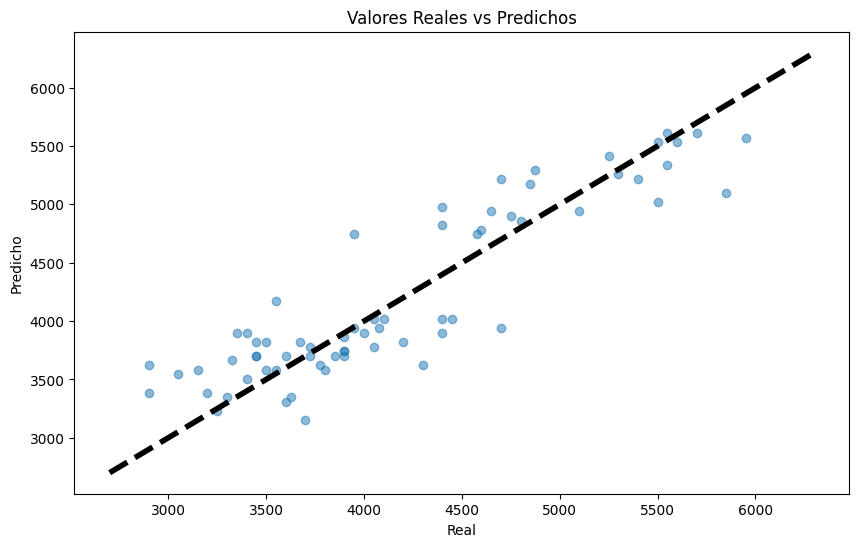

In [57]:
# Gráfico de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.title('Valores Reales vs Predichos')


